# flattening & fc

In [10]:
# flattening layer, inherits from layer class
from layer import Layer
import numpy as np


class Flattening(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        # input: convolutional filter map
        # output: flattened input. as row vectors.
        self.input_shape = input.shape
        output = input.reshape(input.shape[0], -1)
        return output

    def backward(self, output_error, learning_rate):
        # output_error: error of the next layer
        # learning_rate: learning rate
        input_error = np.transpose(output_error).reshape(self.input_shape)
        return input_error


In [2]:
from layer import Layer
import numpy as np


class FullyConnected(Layer):
    def __init__(self, output_dim):
        # self.output_dim = output dimension
        self.output_dim = output_dim

        # initialize weights and biases
        # None, as we don't know the input shape yet
        self.weights = None
        self.bias = None

    def forward(self, input):
        # input: (batch_size, input_dim)
        batch_size, input_dim = input.shape
        self.input = input

        # weights: (input_dim, output_dim)
        # initialize weights xaiver initialization
        if self.weights == None:
            self.weights = np.random.randn(input_dim, self.output_dim) * (
                np.sqrt(2 / (
                    input_dim + self.output_dim
                ))
            )

        # bias: (1, output_dim)
        # initialize biases to 0
        if self.bias == None:
            self.bias = np.zeros((1, self.output_dim))

        # output: (batch_size, output_dim)
        output = np.matmul(input, self.weights) + self.bias
        return output

    def backward(self, output_error, learning_rate):
        # output_error: (batch_size, output_dim)
        # learning_rate: 
        # self.input: (batch_size, input_dim)
        batch_size, output_dim = output_error.shape
        
        # weights: (input_dim, output_dim)
        weights_error = np.matmul(self.input.T, output_error) * 1/batch_size
        self.weights -= learning_rate * weights_error

        # bias: (1, output_dim)
        bias_error = np.sum(output_error, axis=0) * 1/batch_size
        self.bias -= learning_rate * bias_error

        # input_error: (batch_size, input_dim)
        input_error = np.matmul(output_error, self.weights.T)
        return input_error


In [3]:
batch_size = 2
num_channels = 3
height = 5
width = 5
stride = 2
padding = 1
filter_h = 3
filter_w = 3


In [4]:
X = np.random.randint(1,100,(batch_size, num_channels, height, width))

In [5]:
X

array([[[[60, 32, 63, 64, 30],
         [36, 42, 52,  1, 95],
         [18,  8, 35, 13,  2],
         [15, 47, 14, 91, 72],
         [79, 35, 43, 50, 13]],

        [[85, 84, 21, 11, 62],
         [43,  6, 45, 89, 14],
         [70, 51, 10, 53, 48],
         [36, 25, 35,  9, 40],
         [24, 49, 74, 26, 71]],

        [[ 1, 89, 73, 22, 97],
         [74, 82, 76, 95, 47],
         [77, 90, 19, 12,  7],
         [36, 40, 45, 71, 40],
         [41, 32, 65, 43, 58]]],


       [[[16, 52, 19, 77,  8],
         [57, 93, 13, 45, 85],
         [ 7,  8, 57, 36, 69],
         [26, 46, 55, 16, 86],
         [67, 95, 48, 44, 39]],

        [[ 5, 97, 14, 16, 53],
         [54, 95, 53, 89, 51],
         [69, 91, 48, 87, 81],
         [80, 57,  9,  9, 63],
         [83, 81, 17, 97, 82]],

        [[55, 60, 41, 22, 81],
         [22, 35,  1, 70, 11],
         [75, 55, 34, 68,  9],
         [19, 36, 53, 11, 66],
         [73, 11,  5, 88, 45]]]])

In [11]:
flat = Flattening()

In [12]:
flat_z = flat.forward(X)

In [13]:
X.shape

(2, 3, 5, 5)

In [14]:
flat_z.shape

(2, 75)

In [15]:
fcl = FullyConnected(8)

In [17]:
z = fcl.forward(flat_z)

In [18]:
z.shape

(2, 8)

In [19]:
dx = fcl.backward(z, 0.01)

In [20]:
dx.shape

(2, 75)

In [22]:
dx_flat = flat.backward(dx, 0.01)

In [27]:
dx.reshape(X.shape).shape

(2, 3, 5, 5)

In [24]:
dx_flat.shape

(2, 3, 5, 5)

In [9]:
fcl.weights is None

False

In [13]:
fcl2 = FullyConnected(10)

In [15]:
z2 = fcl2.forward(z)

In [16]:
z2.shape

(2, 10)

In [17]:
dx2 = fcl2.backward(z2, 0.01)

In [19]:
dx1 = fcl.backward(dx2, 0.01)

In [20]:
dx1.shape

(2, 10)

# max pool

In [21]:
batch_size = 2
num_channels = 3
height = 5
width = 5

In [22]:
X = np.random.randint(1,100,(batch_size, num_channels, height, width))

In [23]:
X

array([[[[46, 39, 75, 29,  7],
         [ 5, 65, 11, 38, 37],
         [76, 97, 70, 22, 94],
         [88, 94, 16,  3, 77],
         [89, 16, 41, 47, 87]],

        [[87, 71, 48, 17, 42],
         [27, 98, 26, 80,  1],
         [41, 94, 81, 44, 82],
         [54,  2,  8, 45,  1],
         [38, 98, 18, 42, 37]],

        [[11, 30, 96, 91, 73],
         [ 8, 69, 64,  5, 11],
         [57, 29, 52, 93, 95],
         [75, 38, 37, 30, 82],
         [22, 70, 20, 44, 18]]],


       [[[30, 53, 74, 71, 40],
         [79, 86, 77, 80,  5],
         [62, 85, 21, 45, 47],
         [86, 86, 55, 73,  4],
         [74, 48, 62, 66, 20]],

        [[78, 60, 28, 71, 36],
         [57, 59, 88, 32, 40],
         [ 4, 29, 95, 17, 34],
         [83, 78, 31,  3, 33],
         [ 2,  7, 93, 68, 46]],

        [[90, 24, 59, 54, 66],
         [94, 29,  6, 30, 76],
         [33, 26, 56, 38, 14],
         [47, 68, 29, 30, 45],
         [40, 63, 11, 48, 98]]]])

In [24]:
X[:,:,:2,:2]

array([[[[46, 39],
         [ 5, 65]],

        [[87, 71],
         [27, 98]],

        [[11, 30],
         [ 8, 69]]],


       [[[30, 53],
         [79, 86]],

        [[78, 60],
         [57, 59]],

        [[90, 24],
         [94, 29]]]])

In [25]:
sliced_X = X[:,:,:2,:2]

In [27]:
max_pooled = np.max(sliced_X, axis=(2,3))

In [36]:
sliced_X

array([[[[ 3, 77],
         [47, 87]],

        [[45,  1],
         [42, 37]],

        [[30, 82],
         [44, 18]]],


       [[[73,  4],
         [66, 20]],

        [[ 3, 33],
         [68, 46]],

        [[30, 45],
         [48, 98]]]])

In [38]:
# np.argmax(sliced_X, axis=(2,3))
np.unravel_index(sliced_X.argmax(), sliced_X.shape)

(1, 2, 1, 1)

In [29]:
max_pooled.reshape(2,3,1)

array([[[65],
        [98],
        [69]],

       [[86],
        [78],
        [94]]])

In [30]:
stride = 3
filter_h = 2
filter_w = 2

In [31]:
out_h = int((height - filter_h) / stride + 1)
out_w = int((width - filter_w) / stride + 1)

In [32]:
output = np.zeros((batch_size, num_channels, out_h, out_w))

In [33]:
for h_index in range(out_h):
    for w_index in range(out_w):
        sliced_X = X[
            :,
            :,
            h_index * stride:h_index * stride + filter_h,
            w_index * stride:w_index * stride + filter_w
        ]
        output[:,:, h_index, w_index] = np.max(sliced_X, axis=(2,3))

In [34]:
output.shape

(2, 3, 2, 2)

In [35]:
output

array([[[[65., 38.],
         [94., 87.]],

        [[98., 80.],
         [98., 45.]],

        [[69., 91.],
         [75., 82.]]],


       [[[86., 80.],
         [86., 73.]],

        [[78., 71.],
         [83., 68.]],

        [[94., 76.],
         [68., 98.]]]])

In [2]:
import numpy as np
from layer import Layer
from maxpooling import MaxPooling

In [3]:
filter_h = 2
filter_w = 2
stride = 2

In [4]:
mp = MaxPooling(filter_dim=(filter_h, filter_w), stride=stride)

In [5]:
batch_size = 2
num_channels = 3
height = 24
width = 24

In [6]:
X = np.random.randint(1,100,(batch_size, num_channels, height, width))

In [7]:
X

array([[[[17, 94, 56, ..., 29, 19, 50],
         [47, 94, 59, ..., 58, 84, 36],
         [47,  1, 93, ..., 39,  3, 69],
         ...,
         [95, 96, 84, ..., 77, 78,  9],
         [48, 38, 10, ..., 43, 26, 71],
         [14, 95, 27, ..., 14,  8,  7]],

        [[63, 15, 24, ..., 81, 30,  7],
         [37, 35, 56, ..., 18, 26, 48],
         [76, 52, 84, ..., 51, 71, 74],
         ...,
         [45,  4, 37, ..., 43, 32, 12],
         [88, 15, 66, ..., 41, 78, 60],
         [65, 22, 51, ..., 83, 71, 82]],

        [[28, 78, 81, ..., 50, 70,  2],
         [99, 78, 98, ..., 45,  2, 84],
         [23, 62, 71, ..., 40, 60, 36],
         ...,
         [22, 90, 76, ..., 97, 59, 38],
         [ 5, 18, 54, ..., 93, 59, 71],
         [36, 40, 79, ..., 96, 52, 90]]],


       [[[18, 88, 48, ..., 30, 91, 98],
         [98, 25, 99, ..., 12, 35, 69],
         [73, 86,  4, ...,  3, 54, 98],
         ...,
         [42, 52, 34, ..., 53, 36, 60],
         [76, 60, 72, ..., 70, 46, 70],
         [82, 94

In [8]:
z_mp = mp.forward(X)

In [10]:
z_mp.shape

(2, 3, 12, 12)

In [14]:
output_h = int((height - filter_h) / stride + 1)
output_w = int((width - filter_w) / stride + 1)

In [12]:
X_strided = np.lib.stride_tricks.as_strided(
    X,
    shape=(
        batch_size,
        num_channels,
        int((height - filter_h) / stride + 1),
        int((width - filter_w) / stride + 1),
        filter_h,
        filter_w
    ),
    strides=(
        X.strides[0],
        X.strides[1],
        X.strides[2] * stride,
        X.strides[3] * stride,
        X.strides[2],
        X.strides[3]
    )
)

In [13]:
output = np.max(X_strided, axis=(4,5))

In [19]:
X_strided.shape

(2, 3, 12, 12, 2, 2)

In [35]:
# finding the max index
max_index_list = []
for i in range(batch_size):
    for j in range(num_channels):
        for h in range(output_h):
            for w in range(output_w):
                X_window = X[
                    i,
                    j,
                    h*stride:h*stride+filter_h,
                    w*stride:w*stride+filter_w
                ]
                max_index = np.unravel_index(X_window.argmax(), X_window.shape)
                max_index = (i, j, h*stride+max_index[0], w*stride+max_index[1])
                max_index_list.append(max_index)
    

In [36]:
output.shape

(2, 3, 12, 12)

In [42]:
for i, max_index in enumerate(max_index_list):
    if not X[max_index] == output.reshape(-1)[i]:
        print("Error")

In [28]:
max_index_list = np.array(max_index_list)

In [26]:
2*3*12*12

864

In [31]:
max_index_list

array([[ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  2,  0,  1],
       ...,
       [ 1,  2, 11,  9,  0,  1],
       [ 1,  2, 11, 10,  0,  0],
       [ 1,  2, 11, 11,  0,  1]], dtype=int64)

## asserting max pool backprop

In [1]:
#asif
import numpy as np


class MaxPooling():
    def __init__(self, filter_dim, stride):
        # filter_dim: filter dimension. (filter_height, filter_width)

        self.filter_height, self.filter_width = filter_dim
        self.stride = stride
        pass

    def forward(self, input):
        self.input = input
        batch_size, num_channels, height, width = input.shape

        output_height = int(
            (height - self.filter_height) / self.stride + 1)
        output_width = int(
            (width - self.filter_width) / self.stride + 1)

        # # for loop
        # output = np.zeros(
        #     (batch_size, num_channels, output_height, output_width))
        # for h in range(output_height):
        #     for w in range(output_width):
        #         strided_window = input[
        #             :,
        #             :,
        #             h * self.stride:h * self.stride + self.filter_height,
        #             w * self.stride:w * self.stride + self.filter_width
        #         ]
        #         output[:, :, h, w] = np.max(strided_window, axis=(2, 3))

        # as strided
        input_strided = np.lib.stride_tricks.as_strided(
            input,
            shape=(
                batch_size,
                num_channels,
                output_height,
                output_width,
                self.filter_height,
                self.filter_width
            ),
            strides=(
                input.strides[0],
                input.strides[1],
                input.strides[2] * self.stride,
                input.strides[3] * self.stride,
                input.strides[2],
                input.strides[3]
            )
        )
        output = np.max(input_strided, axis=(4, 5))

        # special case when stride == filter_size
        self.max_value_mask = None
        # max_value_mask -> (batch_size, num_channels, input_height, input_width)
        if self.stride == self.filter_height:
            # initialize from output. repeating
            self.max_value_mask = output.repeat(
                self.stride,
                axis=2
            ).repeat(
                self.stride,
                axis=3
            )
            # pad for non-divisible input size
            max_pad_height = height - self.max_value_mask.shape[2]
            max_pad_width = width - self.max_value_mask.shape[3]
            if max_pad_height > 0 or max_pad_width > 0:
                self.max_value_mask = np.pad(
                    self.max_value_mask,
                    (
                        (0, 0),
                        (0, 0),
                        (0, max_pad_height),
                        (0, max_pad_width)
                    ),
                    'constant',
                )
            # compare with input
            # problem for multiple maxima :(
            self.max_value_mask = np.equal(self.max_value_mask, input)

        return output

    def backward(self, output_error, learning_rate):
        # output_error. (batch_size, num_channels, out_height, out_width)
        batch_size, num_channels, height, width = self.input.shape
        # special case when stride == filter_size
        if self.stride == self.filter_height:
            # check if max_value_mask is not None
            if self.max_value_mask is None:
                raise Exception(
                    'max_value_mask is None. Check if stride == filter_height')
            else:
                # output error needs to be tiled
                repeated_output_error = output_error.repeat(
                    self.stride,
                    axis=2
                ).repeat(
                    self.stride,
                    axis=3
                )
                # pad for non-divisible input size
                pad_height = height - repeated_output_error.shape[2]
                pad_width = width - repeated_output_error.shape[3]
                if pad_height > 0 or pad_width > 0:
                    repeated_output_error = np.pad(
                        repeated_output_error,
                        (
                            (0, 0),
                            (0, 0),
                            (0, pad_height),
                            (0, pad_width)
                        ),
                        'constant',
                    )
                # element-wise multiplication
                input_error = np.einsum(
                    'ijkl,ijkl->ijkl',
                    self.max_value_mask,
                    repeated_output_error
                )

        else:
            # for loop
            _, _, output_height, output_width = output_error.shape
            input_error = np.zeros(self.input.shape)

            for i in range(batch_size):
                for j in range(num_channels):
                    for h in range(output_height):
                        for w in range(output_width):
                            input_window = self.input[
                                i,
                                j,
                                h*self.stride:h*self.stride+self.filter_height,
                                w*self.stride:w*self.stride+self.filter_width
                            ]
                            # https://stackoverflow.com/a/9483964
                            max_index = np.unravel_index(
                                input_window.argmax(), input_window.shape)
                            max_index = (i, j, h*self.stride +
                                         max_index[0], w*self.stride+max_index[1])

                            # add overlapped gradients
                            # https://ai.stackexchange.com/a/17109
                            input_error[max_index] += output_error[i, j, h, w]

        return input_error


In [2]:
# antik
# import numpy as np
class PoolingLayer():
    def __init__(self, pool_size, stride):
        self.pool_size = pool_size
        self.stride = stride
        self.input = None

    def __str__(self):
        return f'Pooling Layer (pool_size={self.pool_size}, stride={self.stride})'


    def forward(self, input):
        self.input = input
        n, c, h, w = input.shape
        output_height = (h - self.pool_size) // self.stride + 1
        output_width = (w - self.pool_size) // self.stride + 1
       
        batch_stride, channel_stride, height_stride, width_stride = input.strides
        input_windows = np.lib.stride_tricks.as_strided(input,
            shape = (n, c, output_height, output_width, self.pool_size, self.pool_size),
            strides = (batch_stride, channel_stride, height_stride * self.stride, width_stride * self.stride, height_stride, width_stride)
        )
        output = np.max(input_windows, axis=(4, 5))
        
        if self.stride == self.pool_size:
            mask = output.repeat(
                self.stride,
                axis=-2
            ).repeat(
                self.stride,
                axis=-1
            )
            # print(f'shape of mask after repeat: {mask.shape}')
            # print(f'mask: {mask}')
            # pad for odd shape
            h_pad = h - mask.shape[-2]
            w_pad = w - mask.shape[-1]
            mask = np.pad(
                mask,
                (
                    (0,0),
                    (0,0),
                    (0, h_pad),
                    (0, w_pad)
                ),
                'constant'
            )
            # print(f'shape of mask after pad: {mask.shape}')
            # print(f'mask: {mask}')
            mask = np.equal(input, mask)
            # print(f'shape of mask after equal: {mask.shape}')
            # print(f'mask: {mask}')

            self.cache = mask
        return output

    def backward(self, dL_dout, learning_rate):
        n, c, h, w = self.input.shape
        h_out, w_out = dL_dout.shape[-2:]
        stride = self.stride
        if stride == self.pool_size:
            dL_dout = dL_dout.repeat(stride, axis=-2).repeat(stride, axis=-1)
            mask = self.cache
            # pad for odd shape
            h_pad = h - dL_dout.shape[-2]
            w_pad = w - dL_dout.shape[-1]
            dL_dout = np.pad(dL_dout, ((0,0), (0,0), (0, h_pad), (0, w_pad)), 'constant')

            dL_dout = np.multiply(dL_dout, mask)

            return dL_dout
            
        else:
            dx = np.zeros(self.input.shape)

            for i in range(n):
                for j in range(c):
                    for k in range(h_out):
                        for l in range(w_out):
                            # get the index in the region i,j where the value is the maximum
                            i_t, j_t = np.where(
                                np.max(
                                    self.input[
                                        i,
                                        j,
                                        k * self.stride : k * self.stride + self.pool_size,
                                        l * self.stride : l * self.stride + self.pool_size
                                    ]
                                ) == self.input[
                                    i,
                                    j,
                                    k * self.stride : k * self.stride + self.pool_size,
                                    l * self.stride : l * self.stride + self.pool_size
                                ]
                            )
                            i_t, j_t = i_t[0], j_t[0]
                            # only the position of the maximum element in the region i,j gets the incoming gradient, the other gradients are zero
                            dx[i, j, k * self.stride : k * self.stride + self.pool_size, l * self.stride : l * self.stride + self.pool_size][i_t, j_t] = dL_dout[i, j, k, l]
           
        
        return dx

In [3]:
batch_size = 2
num_channels = 3
input_height = 24
input_width = 24
filter_height = 2
filter_width = 2
stride = 2

In [4]:
X = np.random.randint(1,100,(batch_size, num_channels, input_height, input_width))

In [5]:
X.shape

(2, 3, 24, 24)

In [6]:
mp_antik = PoolingLayer(pool_size=filter_height, stride=stride)

In [7]:
mp_asif = MaxPooling(filter_dim=(filter_height, filter_width), stride=stride)

In [8]:
z_antik = mp_antik.forward(X)

In [9]:
z_asif = mp_asif.forward(X)

In [10]:
np.allclose(z_antik, z_asif)

True

In [52]:
z_asif.shape

(2, 3, 12, 12)

In [11]:
output_error_antik = z_antik.copy()

In [12]:
output_error_asif = z_antik.copy()

In [13]:
input_error_antik = mp_antik.backward(dL_dout=output_error_antik, learning_rate=0.1)

In [14]:
input_error_asif = mp_asif.backward(output_error=output_error_asif, learning_rate=0.1)

In [15]:
np.allclose(input_error_antik, input_error_asif)

True

In [60]:
output_height = 12
output_width = 12

In [64]:
(batch_size, num_channels, output_height, output_width, stride)

(2, 3, 12, 12, 2)

In [62]:
output_mp = np.random.randint(1,100,(batch_size, num_channels, output_height, output_width))

In [65]:
tiled_mp = np.tile(
                output_mp,
                (
                    1,
                    1,
                    stride,
                    stride
                )
            )

In [66]:
repeat_mp = output_mp.repeat(stride, axis=2).repeat(stride, axis=3)

In [67]:
np.allclose(tiled_mp, repeat_mp)

False

In [68]:
(tiled_mp.shape, repeat_mp.shape)

((2, 3, 24, 24), (2, 3, 24, 24))

In [69]:
tiled_mp[0,0]

array([[77, 40, 43, 83, 50, 74, 39, 22, 60, 42, 14, 71, 77, 40, 43, 83,
        50, 74, 39, 22, 60, 42, 14, 71],
       [80, 93, 79, 83, 16, 64, 76, 34, 12,  8, 15,  3, 80, 93, 79, 83,
        16, 64, 76, 34, 12,  8, 15,  3],
       [87, 53, 32, 74, 92, 36,  8, 69, 65, 79, 49, 61, 87, 53, 32, 74,
        92, 36,  8, 69, 65, 79, 49, 61],
       [17, 45, 62, 76, 25, 30,  7, 13, 95, 38, 70, 62, 17, 45, 62, 76,
        25, 30,  7, 13, 95, 38, 70, 62],
       [69,  7, 14, 22, 93, 85, 57, 57, 51, 17, 70, 63, 69,  7, 14, 22,
        93, 85, 57, 57, 51, 17, 70, 63],
       [73, 55, 41, 21, 55, 34,  4, 22, 80, 31, 86, 53, 73, 55, 41, 21,
        55, 34,  4, 22, 80, 31, 86, 53],
       [49, 97, 60, 72, 49, 81, 13, 20, 68, 93, 45, 79, 49, 97, 60, 72,
        49, 81, 13, 20, 68, 93, 45, 79],
       [60, 77, 16, 46, 43, 41, 90, 85, 85, 17, 19, 35, 60, 77, 16, 46,
        43, 41, 90, 85, 85, 17, 19, 35],
       [58, 13, 89, 39, 66, 83, 58, 71, 37,  2, 24, 39, 58, 13, 89, 39,
        66, 83, 58, 71, 

In [70]:
output_mp[0,0]

array([[77, 40, 43, 83, 50, 74, 39, 22, 60, 42, 14, 71],
       [80, 93, 79, 83, 16, 64, 76, 34, 12,  8, 15,  3],
       [87, 53, 32, 74, 92, 36,  8, 69, 65, 79, 49, 61],
       [17, 45, 62, 76, 25, 30,  7, 13, 95, 38, 70, 62],
       [69,  7, 14, 22, 93, 85, 57, 57, 51, 17, 70, 63],
       [73, 55, 41, 21, 55, 34,  4, 22, 80, 31, 86, 53],
       [49, 97, 60, 72, 49, 81, 13, 20, 68, 93, 45, 79],
       [60, 77, 16, 46, 43, 41, 90, 85, 85, 17, 19, 35],
       [58, 13, 89, 39, 66, 83, 58, 71, 37,  2, 24, 39],
       [90, 72,  8, 97, 41, 71, 97, 39, 13,  1, 37, 39],
       [70, 47, 44, 84, 76, 91, 54, 69, 29, 68, 12, 58],
       [20, 30, 74, 15, 34, 73, 50, 72, 46, 86, 33, 63]])

In [71]:
for i in range(batch_size):
    for j in range(num_channels):
        for h in range(height):
            for w in range(width):
                if tiled_mp[i, j, h, w] != repeat_mp[i, j, h, w]:
                    print(f"({i}, {j}, {h}, {w} -> {tiled_mp[i, j, h, w]} != {repeat_mp[i, j, h, w]}")

(0, 0, 0, 1 -> 40 != 77
(0, 0, 0, 2 -> 43 != 40
(0, 0, 0, 3 -> 83 != 40
(0, 0, 0, 4 -> 50 != 43
(0, 0, 0, 5 -> 74 != 43
(0, 0, 0, 6 -> 39 != 83
(0, 0, 0, 7 -> 22 != 83
(0, 0, 0, 8 -> 60 != 50
(0, 0, 0, 9 -> 42 != 50
(0, 0, 0, 10 -> 14 != 74
(0, 0, 0, 11 -> 71 != 74
(0, 0, 0, 12 -> 77 != 39
(0, 0, 0, 13 -> 40 != 39
(0, 0, 0, 14 -> 43 != 22
(0, 0, 0, 15 -> 83 != 22
(0, 0, 0, 16 -> 50 != 60
(0, 0, 0, 17 -> 74 != 60
(0, 0, 0, 18 -> 39 != 42
(0, 0, 0, 19 -> 22 != 42
(0, 0, 0, 20 -> 60 != 14
(0, 0, 0, 21 -> 42 != 14
(0, 0, 0, 22 -> 14 != 71
(0, 0, 1, 0 -> 80 != 77
(0, 0, 1, 1 -> 93 != 77
(0, 0, 1, 2 -> 79 != 40
(0, 0, 1, 3 -> 83 != 40
(0, 0, 1, 4 -> 16 != 43
(0, 0, 1, 5 -> 64 != 43
(0, 0, 1, 6 -> 76 != 83
(0, 0, 1, 7 -> 34 != 83
(0, 0, 1, 8 -> 12 != 50
(0, 0, 1, 9 -> 8 != 50
(0, 0, 1, 10 -> 15 != 74
(0, 0, 1, 11 -> 3 != 74
(0, 0, 1, 12 -> 80 != 39
(0, 0, 1, 13 -> 93 != 39
(0, 0, 1, 14 -> 79 != 22
(0, 0, 1, 15 -> 83 != 22
(0, 0, 1, 16 -> 16 != 60
(0, 0, 1, 17 -> 64 != 60
(0, 0, 1, 18 -> 76 !=

# convolution

## convolve using loops

In [ ]:
X_padded = np.pad(X, ((0, 0),
                        (0, 0),
                        (padding, padding),
                        (padding, padding)
                        ), 'constant')

In [ ]:
X_padded

array([[[[0, 0, 0, 0, 0, 0, 0],
         [0, 4, 1, 1, 5, 9, 0],
         [0, 1, 9, 9, 3, 9, 0],
         [0, 8, 7, 3, 2, 3, 0],
         [0, 1, 6, 2, 4, 9, 0],
         [0, 7, 9, 4, 3, 7, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 4, 3, 9, 0, 9, 0],
         [0, 9, 8, 6, 5, 3, 0],
         [0, 5, 3, 5, 2, 9, 0],
         [0, 1, 6, 9, 2, 0, 0],
         [0, 5, 3, 1, 3, 2, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 1, 4, 7, 5, 6, 0],
         [0, 3, 8, 9, 8, 4, 0],
         [0, 8, 8, 3, 0, 4, 0],
         [0, 6, 4, 8, 3, 1, 0],
         [0, 1, 2, 2, 3, 9, 0],
         [0, 0, 0, 0, 0, 0, 0]]],


       [[[0, 0, 0, 0, 0, 0, 0],
         [0, 7, 8, 7, 2, 2, 0],
         [0, 5, 5, 1, 3, 8, 0],
         [0, 7, 0, 7, 9, 3, 0],
         [0, 0, 7, 4, 3, 2, 0],
         [0, 6, 2, 6, 7, 8, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 7, 6, 6, 6, 0, 0],
         [0, 1, 3, 1, 4, 3, 0]

In [ ]:
X.shape

(2, 3, 5, 5)

In [ ]:
X_padded.shape

(2, 3, 7, 7)

In [ ]:
biases

array([9, 4])

In [ ]:
output.shape

(2, 2, 3, 3)

In [ ]:
for sample_index in range(batch_size):
            for filter_index in range(num_filters):
                for h in range(output_height):
                    for w in range(output_width):
                        output[sample_index, filter_index, h, w] = np.sum(
                            X_padded[sample_index,
                                         :,
                                         h * stride:h * stride + filter_height,
                                         w * stride:w * stride + filter_width
                                         ] * weights[filter_index]
                        ) + biases[filter_index]

In [ ]:
output

array([[[[260., 274., 177.],
         [327., 514., 304.],
         [177., 232., 267.]],

        [[374., 318., 161.],
         [415., 611., 288.],
         [211., 336., 248.]]],


       [[[202., 324., 250.],
         [267., 573., 388.],
         [219., 345., 122.]],

        [[238., 432., 210.],
         [388., 668., 381.],
         [272., 387., 168.]]]])

In [ ]:
np.allclose(output, output_im2col)

True

In [ ]:
output.shape

(2, 2, 3, 3)

## convolve using as strided

In [ ]:
import numpy as np

In [ ]:
from numpy.lib.stride_tricks import as_strided

In [ ]:

arr = np.arange(1, 17).reshape(4, 4) % 10


In [ ]:
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [9, 0, 1, 2],
       [3, 4, 5, 6]], dtype=int32)

In [ ]:
arr.strides

(24, 4)

In [ ]:
arr.shape

(4, 6)

In [ ]:
sub_shape = (3, 3)

In [ ]:

view_shape = tuple(np.subtract(arr.shape, sub_shape) + 1) + sub_shape

In [ ]:
view_shape

(2, 4, 3, 3)

In [ ]:
as_strided(arr, view_shape, arr.strides * 2).shape

(2, 4, 3, 3)

In [ ]:
arr_view = as_strided(arr, view_shape, arr.strides * 2)

In [ ]:
arr_view

array([[[[1, 2, 3],
         [7, 8, 9],
         [3, 4, 5]],

        [[2, 3, 4],
         [8, 9, 0],
         [4, 5, 6]],

        [[3, 4, 5],
         [9, 0, 1],
         [5, 6, 7]],

        [[4, 5, 6],
         [0, 1, 2],
         [6, 7, 8]]],


       [[[7, 8, 9],
         [3, 4, 5],
         [9, 0, 1]],

        [[8, 9, 0],
         [4, 5, 6],
         [0, 1, 2]],

        [[9, 0, 1],
         [5, 6, 7],
         [1, 2, 3]],

        [[0, 1, 2],
         [6, 7, 8],
         [2, 3, 4]]]], dtype=int32)

In [ ]:

arr_view = arr_view.reshape((-1,) + sub_shape)

In [ ]:
arr_view

array([[[1, 2, 3],
        [7, 8, 9],
        [3, 4, 5]],

       [[2, 3, 4],
        [8, 9, 0],
        [4, 5, 6]],

       [[3, 4, 5],
        [9, 0, 1],
        [5, 6, 7]],

       [[4, 5, 6],
        [0, 1, 2],
        [6, 7, 8]],

       [[7, 8, 9],
        [3, 4, 5],
        [9, 0, 1]],

       [[8, 9, 0],
        [4, 5, 6],
        [0, 1, 2]],

       [[9, 0, 1],
        [5, 6, 7],
        [1, 2, 3]],

       [[0, 1, 2],
        [6, 7, 8],
        [2, 3, 4]]], dtype=int32)

In [ ]:
arr_view.shape

(8, 3, 3)

In [ ]:
arr = np.arange(1, 26).reshape(5, 5)

In [ ]:
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [9, 0, 1, 2],
       [3, 4, 5, 6]], dtype=int32)

In [ ]:
stride_count = 2

In [ ]:
out_h = 2
out_w = 2
k_h = 2
k_w = 2

In [ ]:
new_shape=(out_h, out_w, k_h, k_w)

In [ ]:
new_stride = (
        arr.strides[0] * stride_count,
        arr.strides[1] * stride_count,
        arr.strides[0],
        arr.strides[1]
    )

In [ ]:
new_stride

(32, 8, 16, 4)

In [ ]:
as_strided(arr, new_shape, new_stride)

array([[[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]],


       [[[9, 0],
         [3, 4]],

        [[1, 2],
         [5, 6]]]], dtype=int32)

In [ ]:
# input_strided -> (batch_size, num_channels, output_height, output_width, filter_height, filter_width)
# weights -> (num_filters, num_channels, filter_height, filter_width)
# output -> (batch_size, num_filters, output_height, output_width)

In [ ]:
as_strided(arr, shape=(2,2,3,3), strides=new_stride)

array([[[[          1,           2,           3],
         [          6,           7,           8],
         [         11,          12,          13]],

        [[          4,           5,           6],
         [          9,          10,          11],
         [         14,          15,          16]]],


       [[[         16,          17,          18],
         [         21,          22,          23],
         [  859202354,  1116456951, -1879046912]],

        [[         19,          20,          21],
         [         24,          25,   859202354],
         [ -563353952,       32764, -2023983936]]]])

In [ ]:
arr = np.random.randint(0,100,(batch_size, num_channels, height, width))

In [ ]:
arr

array([[[[85, 17, 40, 10, 77],
         [ 3, 91, 82, 19, 29],
         [47, 45, 21, 35, 80],
         [63, 33, 89, 43, 18],
         [94, 73, 32, 71, 15]],

        [[87, 78,  2, 99, 29],
         [59, 22, 92, 96, 22],
         [77, 97, 27, 67, 81],
         [88, 49, 91, 45, 54],
         [78, 42, 91, 60, 49]],

        [[79, 77, 76, 67,  7],
         [ 6, 13, 11, 54, 46],
         [34, 86, 75, 87, 13],
         [12, 31, 84, 10, 53],
         [89, 38, 24,  7, 75]]],


       [[[81, 81, 45, 38, 49],
         [73, 68, 44, 78, 74],
         [56, 82, 83, 84, 33],
         [86, 65, 68,  8, 75],
         [67, 72, 58, 85, 44]],

        [[36,  6,  7, 16, 32],
         [48, 55, 61, 91, 11],
         [15, 91, 64, 49, 81],
         [26, 43, 31, 54, 42],
         [56, 93, 29, 45,  1]],

        [[38,  9, 25, 59, 88],
         [ 6, 75, 42, 15, 72],
         [56, 91, 74, 19, 75],
         [ 0, 62, 98, 74, 94],
         [57, 88,  0, 30, 88]]]])

In [ ]:
# flattened array
out_arr = arr.reshape(batch_size, -1)

In [ ]:
arr

array([[[[85, 17, 40, 10, 77],
         [ 3, 91, 82, 19, 29],
         [47, 45, 21, 35, 80],
         [63, 33, 89, 43, 18],
         [94, 73, 32, 71, 15]],

        [[87, 78,  2, 99, 29],
         [59, 22, 92, 96, 22],
         [77, 97, 27, 67, 81],
         [88, 49, 91, 45, 54],
         [78, 42, 91, 60, 49]],

        [[79, 77, 76, 67,  7],
         [ 6, 13, 11, 54, 46],
         [34, 86, 75, 87, 13],
         [12, 31, 84, 10, 53],
         [89, 38, 24,  7, 75]]],


       [[[81, 81, 45, 38, 49],
         [73, 68, 44, 78, 74],
         [56, 82, 83, 84, 33],
         [86, 65, 68,  8, 75],
         [67, 72, 58, 85, 44]],

        [[36,  6,  7, 16, 32],
         [48, 55, 61, 91, 11],
         [15, 91, 64, 49, 81],
         [26, 43, 31, 54, 42],
         [56, 93, 29, 45,  1]],

        [[38,  9, 25, 59, 88],
         [ 6, 75, 42, 15, 72],
         [56, 91, 74, 19, 75],
         [ 0, 62, 98, 74, 94],
         [57, 88,  0, 30, 88]]]])

In [ ]:
np.reshape(arr, (batch_size, np.prod(arr.shape[1:])))

array([[85, 17, 40, 10, 77,  3, 91, 82, 19, 29, 47, 45, 21, 35, 80, 63,
        33, 89, 43, 18, 94, 73, 32, 71, 15, 87, 78,  2, 99, 29, 59, 22,
        92, 96, 22, 77, 97, 27, 67, 81, 88, 49, 91, 45, 54, 78, 42, 91,
        60, 49, 79, 77, 76, 67,  7,  6, 13, 11, 54, 46, 34, 86, 75, 87,
        13, 12, 31, 84, 10, 53, 89, 38, 24,  7, 75],
       [81, 81, 45, 38, 49, 73, 68, 44, 78, 74, 56, 82, 83, 84, 33, 86,
        65, 68,  8, 75, 67, 72, 58, 85, 44, 36,  6,  7, 16, 32, 48, 55,
        61, 91, 11, 15, 91, 64, 49, 81, 26, 43, 31, 54, 42, 56, 93, 29,
        45,  1, 38,  9, 25, 59, 88,  6, 75, 42, 15, 72, 56, 91, 74, 19,
        75,  0, 62, 98, 74, 94, 57, 88,  0, 30, 88]])

In [ ]:
out_arr

array([[85, 17, 40, 10, 77,  3, 91, 82, 19, 29, 47, 45, 21, 35, 80, 63,
        33, 89, 43, 18, 94, 73, 32, 71, 15, 87, 78,  2, 99, 29, 59, 22,
        92, 96, 22, 77, 97, 27, 67, 81, 88, 49, 91, 45, 54, 78, 42, 91,
        60, 49, 79, 77, 76, 67,  7,  6, 13, 11, 54, 46, 34, 86, 75, 87,
        13, 12, 31, 84, 10, 53, 89, 38, 24,  7, 75],
       [81, 81, 45, 38, 49, 73, 68, 44, 78, 74, 56, 82, 83, 84, 33, 86,
        65, 68,  8, 75, 67, 72, 58, 85, 44, 36,  6,  7, 16, 32, 48, 55,
        61, 91, 11, 15, 91, 64, 49, 81, 26, 43, 31, 54, 42, 56, 93, 29,
        45,  1, 38,  9, 25, 59, 88,  6, 75, 42, 15, 72, 56, 91, 74, 19,
        75,  0, 62, 98, 74, 94, 57, 88,  0, 30, 88]])

In [ ]:
out_arr.shape

(2, 75)

In [ ]:
out_arr.T

array([[85, 81],
       [17, 81],
       [40, 45],
       [10, 38],
       [77, 49],
       [ 3, 73],
       [91, 68],
       [82, 44],
       [19, 78],
       [29, 74],
       [47, 56],
       [45, 82],
       [21, 83],
       [35, 84],
       [80, 33],
       [63, 86],
       [33, 65],
       [89, 68],
       [43,  8],
       [18, 75],
       [94, 67],
       [73, 72],
       [32, 58],
       [71, 85],
       [15, 44],
       [87, 36],
       [78,  6],
       [ 2,  7],
       [99, 16],
       [29, 32],
       [59, 48],
       [22, 55],
       [92, 61],
       [96, 91],
       [22, 11],
       [77, 15],
       [97, 91],
       [27, 64],
       [67, 49],
       [81, 81],
       [88, 26],
       [49, 43],
       [91, 31],
       [45, 54],
       [54, 42],
       [78, 56],
       [42, 93],
       [91, 29],
       [60, 45],
       [49,  1],
       [79, 38],
       [77,  9],
       [76, 25],
       [67, 59],
       [ 7, 88],
       [ 6,  6],
       [13, 75],
       [11, 42],
       [54, 15

In [ ]:
arr.shape

(2, 3, 5, 5)

In [ ]:
X_strided = as_strided(
                    X_padded, shape=(
                                    batch_size,
                                    num_channels,
                                    output_height,
                                    output_width,
                                    filter_h,
                                    filter_w
                                ), strides=(
                                    X.strides[0],
                                    X.strides[1],
                                    X.strides[2] * stride,
                                    X.strides[3] * stride,
                                    X.strides[2],
                                    X.strides[3]
                                )
                    )

In [ ]:
X_strided.shape

(2, 3, 3, 3, 3, 3)

In [ ]:
output_strided = np.einsum('bcklmn,fcmn->bfkl', X_strided, weights)

In [ ]:
output_strided.shape

(2, 2, 3, 3)

In [ ]:
output

array([[[[281., 606., 378.],
         [464., 740., 362.],
         [224., 376., 247.]],

        [[288., 558., 373.],
         [469., 674., 302.],
         [280., 364., 204.]]],


       [[[309., 460., 279.],
         [336., 739., 425.],
         [223., 489., 279.]],

        [[280., 469., 217.],
         [363., 610., 486.],
         [281., 429., 333.]]]])

In [ ]:
output_strided

array([[[[366, 420, 493],
         [485, 547, 320],
         [261, 361, 401]],

        [[327, 393, 447],
         [524, 464, 373],
         [337, 306, 354]]],


       [[[337, 309, 412],
         [387, 143, 239],
         [316, 309, 369]],

        [[253, 368, 395],
         [321, 158, 166],
         [226, 245, 299]]]])

In [ ]:
np.allclose(output, output_strided)

False

In [10]:
# from layer import Layer
from utils import *
import numpy as np


class Convolution(Layer):
    def __init__(self, num_filters, filter_dim, stride=1, padding=0):
        # num_filters: number of output channels
        # filter_dim: filter dimension (height, width)
        # stride: stride of the convolution. default: 1
        # padding: padding of the input (assuming zero padding and square padding). default: 0

        self.num_filters = num_filters
        self.filter_height, self.filter_width = filter_dim
        self.stride = stride
        self.padding = padding

        # initialize weights and biases
        # None, as we don't know the input shape yet
        self.weights = None
        self.biases = None

    def forward(self, input):
        # input: (batch_size, num_channels, input_height, input_width)
        batch_size, num_channels, input_height, input_width = input.shape

        # weights: (num_filters, num_channels, filter_height, filter_width)
        # initialize weights xaiver initialization
        if self.weights is None:
            self.weights = np.random.randn(self.num_filters, num_channels, self.filter_height, self.filter_width) * (
                np.sqrt(2 / (
                    self.filter_height * self.filter_width
                ))
            )

        # biases: (num_filters, 1)
        # initialize biases to 0
        if self.biases is None:
            self.biases = np.zeros(self.num_filters)

        # output: (batch_size, num_filters, output_height, output_width)
        output_height = int((input_height - self.filter_height +
                            2 * self.padding) / self.stride + 1)
        output_width = int((input_width - self.filter_width + 2 *
                           self.padding) / self.stride + 1)

        output = np.zeros((batch_size, self.num_filters,
                          output_height, output_width))

        # np.pad: Number of values padded to the edges of each axis.
        # ((before_1, after_1), ... (before_N, after_N)) unique pad widths for each axis.
        # pad with 'constant' values. default: 0
        input_padded = np.pad(input, ((0, 0),
                                      (0, 0),
                                      (self.padding, self.padding),
                                      (self.padding, self.padding)
                                      ), 'constant')

        for sample_index in range(batch_size):
            for filter_index in range(self.num_filters):
                for h in range(output_height):
                    for w in range(output_width):
                        output[sample_index, filter_index, h, w] = np.sum(
                            input_padded[sample_index,
                                         :,
                                         h * self.stride:h * self.stride + self.filter_height,
                                         w * self.stride:w * self.stride + self.filter_width
                                         ] * self.weights[filter_index]
                        ) + self.biases[filter_index]

        # vectorized implementation
        input_col = im2col(input, self.filter_height,
                           self.filter_width, self.stride, self.padding)
        weights_col = self.weights.reshape(self.num_filters, -1)
        bias_col = self.biases.reshape(-1, 1)

        output_col = np.matmul(weights_col, input_col) + bias_col

        output_im2col = np.array(np.hsplit(output_col, batch_size)).reshape(
            (batch_size, self.num_filters, output_height, output_width))
        
        # as strided
        X_strided = np.lib.stride_tricks.as_strided(
            input_padded,
            shape=(
                batch_size,
                num_channels,
                output_height,
                output_width,
                self.filter_height,
                self.filter_width
                ),
            strides=(
                input_padded.strides[0],
                input_padded.strides[1],
                input_padded.strides[2] * self.stride,
                input_padded.strides[3] * self.stride,
                input_padded.strides[2],
                input_padded.strides[3]
            )
        )
        # einsum
        output_einsum = np.einsum(
            'bcijkl,fckl->bfij',
            X_strided, self.weights
        )

        return output, output_im2col, output_einsum

In [11]:
batch_size = 2
num_channels = 3
height = 5
width = 5
num_filters = 2
filter_dim = (3, 3)
stride = 2
padding = 1

In [12]:
conv = Convolution(num_filters, filter_dim, stride, padding)

In [13]:
X = np.random.randint(1,100,(batch_size, num_channels, height, width))

In [14]:
X.shape

(2, 3, 5, 5)

In [15]:
output, output_im2col, output_einsum = conv.forward(X)

In [16]:
output.shape

(2, 2, 3, 3)

In [17]:
output_im2col.shape

(2, 2, 3, 3)

In [18]:
output_einsum.shape

(2, 2, 3, 3)

In [19]:
np.allclose(output, output_im2col)

True

In [20]:
np.allclose(output, output_einsum)

True

In [21]:
np.allclose(output_im2col, output_einsum)

True

## checking bias add in conv forward

In [1]:
import numpy as np

In [2]:
num_filters = 10

In [5]:
# biases = np.zeros(num_filters)
biases = np.random.randint(1,100,(num_filters))

In [7]:
biases.shape

(10,)

In [8]:
batch_size = 2
output_channel = num_filters
output_height = 12
output_width = 12

In [9]:
output = np.random.randint(1,100,(batch_size, output_channel, output_height, output_width))

In [11]:
reshaped_bias = biases.reshape(1,-1,1,1)

In [12]:
reshaped_bias.shape

(1, 10, 1, 1)

In [13]:
reshaped_bias

array([[[[50]],

        [[26]],

        [[55]],

        [[29]],

        [[52]],

        [[85]],

        [[29]],

        [[25]],

        [[97]],

        [[35]]]])

In [14]:
output + reshaped_bias

array([[[[ 94, 124,  63, ...,  54,  58,  99],
         [ 79, 110,  61, ...,  82,  64,  59],
         [128, 128, 104, ...,  60, 112, 109],
         ...,
         [ 90, 135, 100, ...,  67, 129, 108],
         [147, 108,  59, ..., 107,  91, 126],
         [101,  99,  92, ...,  68,  55, 133]],

        [[ 91,  34,  30, ...,  64,  74,  68],
         [ 35,  36, 121, ...,  48,  53,  60],
         [ 42, 113, 110, ...,  62,  61,  40],
         ...,
         [ 40, 125,  93, ...,  44,  68,  35],
         [102,  94,  47, ..., 121, 105,  44],
         [ 90,  60, 104, ..., 106,  68,  43]],

        [[113,  77,  62, ...,  87,  86,  88],
         [141,  99,  99, ...,  65,  66,  58],
         [134,  76, 123, ..., 128, 141,  91],
         ...,
         [103, 126, 103, ...,  69, 113, 131],
         [ 58, 111,  83, ..., 135, 115, 149],
         [114, 101, 126, ..., 124, 151, 147]],

        ...,

        [[ 68, 103,  77, ..., 103, 115,  34],
         [105, 123,  76, ...,  30,  45, 109],
         [ 72,  64

## convolution backward

In [33]:
from layer import Layer
# from utils import *
import numpy as np


class Convolution(Layer):
    def __init__(self, num_filters, filter_dim, stride=1, padding=0):
        # num_filters: number of output channels
        # filter_dim: filter dimension (height, width)
        # stride: stride of the convolution. default: 1
        # padding: padding of the input (assuming zero padding and square padding). default: 0

        self.num_filters = num_filters
        self.filter_height, self.filter_width = filter_dim
        self.stride = stride
        self.padding = padding

        # initialize weights and biases
        # None, as we don't know the input shape yet
        self.weights = None
        self.biases = None

    def forward(self, input):
        # input: (batch_size, num_channels, input_height, input_width)
        batch_size, num_channels, input_height, input_width = input.shape

        # weights: (num_filters, num_channels, filter_height, filter_width)
        # initialize weights xaiver initialization
        if self.weights is None:
            self.weights = np.random.randn(self.num_filters, num_channels, self.filter_height, self.filter_width) * (
                np.sqrt(2 / (
                    self.filter_height * self.filter_width
                ))
            )

        # biases: (num_filters, 1)
        # initialize biases to 0
        if self.biases is None:
            self.biases = np.zeros(self.num_filters)

        # output: (batch_size, num_filters, output_height, output_width)
        output_height = int((input_height - self.filter_height +
                            2 * self.padding) / self.stride + 1)
        output_width = int((input_width - self.filter_width + 2 *
                           self.padding) / self.stride + 1)

        # np.pad: Number of values padded to the edges of each axis.
        # ((before_1, after_1), ... (before_N, after_N)) unique pad widths for each axis.
        # pad with 'constant' values. default: 0
        input_padded = np.pad(input, ((0, 0),
                                      (0, 0),
                                      (self.padding, self.padding),
                                      (self.padding, self.padding)
                                      ), 'constant')

        # # for loop
        #
        # output = np.zeros((batch_size, self.num_filters,
        #                   output_height, output_width))
        #
        # for sample_index in range(batch_size):
        #     for filter_index in range(self.num_filters):
        #         for h in range(output_height):
        #             for w in range(output_width):
        #                 output[sample_index, filter_index, h, w] = np.sum(
        #                     input_padded[sample_index,
        #                                  :,
        #                                  h * self.stride:h * self.stride + self.filter_height,
        #                                  w * self.stride:w * self.stride + self.filter_width
        #                                  ] * self.weights[filter_index]
        #                 ) + self.biases[filter_index]

        # as strided
        # https://stackoverflow.com/a/53099870
        input_strided = np.lib.stride_tricks.as_strided(
            input_padded,
            shape=(
                batch_size,
                num_channels,
                output_height,
                output_width,
                self.filter_height,
                self.filter_width
            ),
            strides=(
                input_padded.strides[0],
                input_padded.strides[1],
                input_padded.strides[2] * self.stride,
                input_padded.strides[3] * self.stride,
                input_padded.strides[2],
                input_padded.strides[3]
            )
        )
        # einsum
        # https://ajcr.net/Basic-guide-to-einsum/
        output = np.einsum(
            'bcijkl,fckl->bfij',
            input_strided, self.weights
        )
        output += self.biases.reshape(1, -1, 1, 1)

        # self.cache = (input, input_padded, input_strided)
        self.cache = input
        return output

    def backward(self, output_error, learning_rate):
        # output_error: (batch_size, num_filters, output_height, output_width)
        # learning_rate: learning rate
        # input, input_padded, input_strided = self.cache
        input = self.cache

        # dilate the output error
        dilate = self.stride - 1
        # insert dilate number of 0 rows/cols between each row/col
        output_error_modified = np.insert(
            output_error,
            obj=np.arange(1, output_error.shape[2]).repeat(dilate),
            values=0,
            axis=2
        )
        output_error_modified = np.insert(
            output_error_modified,
            obj=np.arange(1, output_error_modified.shape[3]).repeat(dilate),
            values=0,
            axis=3
        )
        padded_height = output_error_modified.shape[2] + \
            2 * (self.filter_height - 1)
        padded_width = output_error_modified.shape[3] + \
            2 * (self.filter_width - 1)

        input_error_height = padded_height - self.filter_height + 1
        input_error_width = padded_width - self.filter_width + 1

        # check with the original input
        # dilate the output error at the end
        if input_error_height < input.shape[2]:
            output_error_modified = np.insert(
                output_error_modified,
                obj=np.array([output_error_modified.shape[2]]).repeat(
                    input_error_height - input.shape[2]),
                values=0,
                axis=2
            )
        if input_error_width < input.shape[3]:
            output_error_modified = np.insert(
                output_error_modified,
                obj=np.array([output_error_modified.shape[3]]).repeat(
                    input_error_width - input.shape[3]),
                values=0,
                axis=3
            )
        # pad the output error with filter_size - 1
        output_error_modified = np.pad(
            output_error_modified,
            (
                (0, 0),
                (0, 0),
                (self.filter_height - 1, self.filter_height - 1),
                (self.filter_width - 1, self.filter_width - 1)
            ),
            'constant'
        )
        # rotate the weights by 180
        weights_modified = np.rot90(self.weights, 2, (2, 3))

        assert input_error_height == output_error_modified.shape[2] - \
            self.filter_height + 1
        assert input_error_width == output_error_modified.shape[3] - \
            self.filter_width + 1
        # as strided
        output_error_modified_strided = np.lib.stride_tricks.as_strided(
            output_error_modified,
            shape=(
                output_error_modified.shape[0],
                output_error_modified.shape[1],
                input_error_height,
                input_error_width,
                self.filter_height,
                self.filter_width
            ),
            strides=(
                output_error_modified.strides[0],
                output_error_modified.strides[1],
                output_error_modified.strides[2],
                output_error_modified.strides[3],
                output_error_modified.strides[2],
                output_error_modified.strides[3]
            )
        )
        # einsum
        input_error = np.einsum(
            'bfijkl,fckl->bcij',
            output_error_modified_strided, weights_modified
        )

        return input_error


In [113]:
from layer import Layer
# from utils import *
import numpy as np


class Convolution(Layer):
    def __init__(self, num_filters, filter_dim, stride=1, padding=0):
        # num_filters: number of output channels
        # filter_dim: filter dimension (height, width)
        # stride: stride of the convolution. default: 1
        # padding: padding of the input (assuming zero padding and square padding). default: 0

        self.num_filters = num_filters
        self.filter_height, self.filter_width = filter_dim
        self.stride = stride
        self.padding = padding

        # initialize weights and biases
        # None, as we don't know the input shape yet
        self.weights = None
        self.biases = None

    def forward(self, input):
        # input: (batch_size, num_channels, input_height, input_width)
        batch_size, num_channels, input_height, input_width = input.shape

        # weights: (num_filters, num_channels, filter_height, filter_width)
        # initialize weights xaiver initialization
        if self.weights is None:
            self.weights = np.random.randn(self.num_filters, num_channels, self.filter_height, self.filter_width) * (
                np.sqrt(2 / (
                    self.filter_height * self.filter_width
                ))
            )

        # biases: (num_filters, 1)
        # initialize biases to 0
        if self.biases is None:
            self.biases = np.zeros(self.num_filters)

        # output: (batch_size, num_filters, output_height, output_width)
        output_height = int((input_height - self.filter_height +
                            2 * self.padding) / self.stride + 1)
        output_width = int((input_width - self.filter_width + 2 *
                           self.padding) / self.stride + 1)

        # np.pad: Number of values padded to the edges of each axis.
        # ((before_1, after_1), ... (before_N, after_N)) unique pad widths for each axis.
        # pad with 'constant' values. default: 0
        input_padded = np.pad(input, ((0, 0),
                                      (0, 0),
                                      (self.padding, self.padding),
                                      (self.padding, self.padding)
                                      ), 'constant')

        # # for loop
        #
        # output = np.zeros((batch_size, self.num_filters,
        #                   output_height, output_width))
        #
        # for sample_index in range(batch_size):
        #     for filter_index in range(self.num_filters):
        #         for h in range(output_height):
        #             for w in range(output_width):
        #                 output[sample_index, filter_index, h, w] = np.sum(
        #                     input_padded[sample_index,
        #                                  :,
        #                                  h * self.stride:h * self.stride + self.filter_height,
        #                                  w * self.stride:w * self.stride + self.filter_width
        #                                  ] * self.weights[filter_index]
        #                 ) + self.biases[filter_index]

        # as strided
        # https://stackoverflow.com/a/53099870
        input_strided = np.lib.stride_tricks.as_strided(
            input_padded,
            shape=(
                batch_size,
                num_channels,
                output_height,
                output_width,
                self.filter_height,
                self.filter_width
            ),
            strides=(
                input_padded.strides[0],
                input_padded.strides[1],
                input_padded.strides[2] * self.stride,
                input_padded.strides[3] * self.stride,
                input_padded.strides[2],
                input_padded.strides[3]
            )
        )
        # einsum
        # https://ajcr.net/Basic-guide-to-einsum/
        output = np.einsum(
            'bcijkl,fckl->bfij',
            input_strided, self.weights
        )
        output += self.biases.reshape(1, -1, 1, 1)

        # self.cache = (input, input_padded, input_strided)
        self.cache = input_padded
        # self.cache = input
        return output

    def backward(self, output_error, learning_rate):
        # output_error: (batch_size, num_filters, output_height, output_width)
        # learning_rate: learning rate
        # input, input_padded, input_strided = self.cache
        input_padded = self.cache
        # input = self.cache

        # dilate the output error
        dilate = self.stride - 1
        # insert dilate number of 0 rows/cols between each row/col
        output_error_modified = np.insert(
            output_error,
            obj=np.arange(1, output_error.shape[2]).repeat(dilate),
            values=0,
            axis=2
        )
        output_error_modified = np.insert(
            output_error_modified,
            obj=np.arange(1, output_error_modified.shape[3]).repeat(dilate),
            values=0,
            axis=3
        )

        weights_error_height = input_padded.shape[2] - \
            output_error_modified.shape[2] + 1
        weights_error_width = input_padded.shape[3] - \
            output_error_modified.shape[3] + 1

        # check with original weights
        # dilate the output error at the end
        if weights_error_height > self.weights.shape[2]:
            output_error_modified_weights = np.insert(
                output_error_modified,
                obj=np.array([output_error_modified.shape[2]]).repeat(
                    weights_error_height - self.weights.shape[2]
                ),
                values=0,
                axis=2
            )
        if weights_error_width > self.weights.shape[3]:
            output_error_modified_weights = np.insert(
                output_error_modified_weights,
                obj=np.array([output_error_modified_weights.shape[3]]).repeat(
                    weights_error_width - self.weights.shape[3]
                ),
                values=0,
                axis=3
            )

        # update weights
        # as strided
        input_strided = np.lib.stride_tricks.as_strided(
            input_padded,
            shape=(
                input_padded.shape[0],
                input_padded.shape[1],
                self.weights.shape[2],
                self.weights.shape[3],
                output_error_modified_weights.shape[2],
                output_error_modified_weights.shape[3]
            ),
            strides=(
                input_padded.strides[0],
                input_padded.strides[1],
                input_padded.strides[2],
                input_padded.strides[3],
                input_padded.strides[2],
                input_padded.strides[3]
            )
        )
        weights_error = np.einsum(
            'bcklij,bfij->fckl',
            input_strided, output_error_modified_weights
        )
        weights_error = weights_error * 1/input_padded.shape[0]
        self.weights -= learning_rate * weights_error

        # update biases
        biases_error = np.sum(output_error_modified,
                              axis=(0, 2, 3)) * 1/input_padded.shape[0]
        self.biases -= learning_rate * biases_error

        # input error calculation
        padded_height = output_error_modified.shape[2] + \
            2 * (self.filter_height - 1)
        padded_width = output_error_modified.shape[3] + \
            2 * (self.filter_width - 1)

        input_error_height = padded_height - self.filter_height + 1
        input_error_width = padded_width - self.filter_width + 1

        # check with the original input
        # dilate the output error at the end
        if input_error_height < input_padded.shape[2]:
            output_error_modified = np.insert(
                output_error_modified,
                obj=np.array([output_error_modified.shape[2]]).repeat(
                    input_padded.shape[2] - input_error_height),
                values=0,
                axis=2
            )
        if input_error_width < input_padded.shape[3]:
            output_error_modified = np.insert(
                output_error_modified,
                obj=np.array([output_error_modified.shape[3]]).repeat(
                    input_padded.shape[3] - input_error_width),
                values=0,
                axis=3
            )

        # pad the output error with filter_size - 1
        output_error_modified = np.pad(
            output_error_modified,
            (
                (0, 0),
                (0, 0),
                (self.filter_height - 1, self.filter_height - 1),
                (self.filter_width - 1, self.filter_width - 1)
            ),
            'constant'
        )
        # rotate the weights by 180
        weights_modified = np.rot90(self.weights, 2, (2, 3))

        # assert input_padded.shape[2] == output_error_modified.shape[2] - \
        #     self.filter_height + 1
        # assert input_padded.shape[3] == output_error_modified.shape[3] - \
        #     self.filter_width + 1
        # as strided
        output_error_modified_strided = np.lib.stride_tricks.as_strided(
            output_error_modified,
            shape=(
                output_error_modified.shape[0],
                output_error_modified.shape[1],
                input_padded.shape[2],
                input_padded.shape[3],
                self.filter_height,
                self.filter_width
            ),
            strides=(
                output_error_modified.strides[0],
                output_error_modified.strides[1],
                output_error_modified.strides[2],
                output_error_modified.strides[3],
                output_error_modified.strides[2],
                output_error_modified.strides[3]
            )
        )
        # einsum
        input_error = np.einsum(
            'bfijkl,fckl->bcij',
            output_error_modified_strided, weights_modified
        )

        # drop the padded rows/cols
        input_error = input_error[:, :, self.padding:-
                                  self.padding, self.padding:-self.padding]

        return input_error


In [114]:
arr2d = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])

In [115]:
np.argmax(arr2d, axis=1)

array([9, 9], dtype=int64)

In [116]:
batch_size = 2
num_channels = 3
height = 24
width = 24
# height = 6
# width = 6
num_filters = 10
filter_dim = (4, 4)
# filter_dim = (5, 5)
stride = 4
padding = 1

In [117]:
X = np.random.randint(1,100, (batch_size, num_channels, height, width))

In [118]:
X.shape

(2, 3, 24, 24)

In [119]:
cnv = Convolution(num_filters, filter_dim, stride, padding)

In [120]:
z = cnv.forward(X)

In [121]:
z.shape

(2, 10, 6, 6)

In [122]:
dx = cnv.backward(z, 0.1)

In [123]:
dx.shape

(2, 3, 24, 24)

### dilation

In [1]:
import numpy as np

In [3]:
output_height = int((height - filter_dim[0] + 2 * padding) / stride + 1)
output_width = int((width - filter_dim[1] + 2 * padding) / stride + 1)

In [10]:
X = np.random.randint(1,100,(batch_size, num_channels, height, width))

In [11]:
dilate = stride - 1

In [13]:
X_dilated = np.insert(X, obj=np.arange(1, X.shape[2]).repeat(dilate), values=0, axis=2)

In [14]:
X_dilated = np.insert(X_dilated, obj=np.arange(1, X_dilated.shape[3]).repeat(dilate), values=0, axis=3)

In [18]:
checking_X = X[0,0]

In [19]:
checking_X

array([[74, 97, 91, 61, 10, 15],
       [43, 47, 85,  9, 57, 87],
       [54, 22,  2, 47, 48, 67],
       [13, 36, 44, 56, 64, 42],
       [18, 93, 17, 33, 53, 56],
       [30, 83, 98, 40, 12, 68]])

In [21]:
checking_X.shape[0]

6

In [24]:
np.arange(checking_X.shape[0], checking_X.shape[0]+1)

array([6])

In [25]:
import os

In [26]:
os.getcwd()

'e:\\Study\\Level-4\\L4T2\\CSE471-472\\CSE472\\github-repo\\cse-472-offlines\\offline-4-cnn\\codes'

In [27]:
os.path.join("abcd","def")

'abcd\\def'

In [31]:
np.array([checking_X.shape[0]])

array([6])

In [32]:
np.insert(
    checking_X,
    obj=np.array([checking_X.shape[0]]).repeat(2),
    values=0,
    axis=0
)

array([[74, 97, 91, 61, 10, 15],
       [43, 47, 85,  9, 57, 87],
       [54, 22,  2, 47, 48, 67],
       [13, 36, 44, 56, 64, 42],
       [18, 93, 17, 33, 53, 56],
       [30, 83, 98, 40, 12, 68],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

In [17]:
X[0,0]

array([[74, 97, 91, 61, 10, 15],
       [43, 47, 85,  9, 57, 87],
       [54, 22,  2, 47, 48, 67],
       [13, 36, 44, 56, 64, 42],
       [18, 93, 17, 33, 53, 56],
       [30, 83, 98, 40, 12, 68]])

In [16]:
X_dilated[0,0]

array([[74,  0,  0,  0, 97,  0,  0,  0, 91,  0,  0,  0, 61,  0,  0,  0,
        10,  0,  0,  0, 15],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [43,  0,  0,  0, 47,  0,  0,  0, 85,  0,  0,  0,  9,  0,  0,  0,
        57,  0,  0,  0, 87],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [54,  0,  0,  0, 22,  0,  0,  0,  2,  0,  0,  0, 47,  0,  0,  0,
        48,  0,  0,  0, 67],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,

In [19]:
output_error = np.random.randn(batch_size, num_filters, output_height, output_width)

In [25]:
output_error

array([[[[-8.36280356e-01,  1.28842539e-01, -1.28031745e+00,
           5.60463990e-01,  1.85678551e-01,  1.57965671e+00],
         [ 6.39825067e-01,  4.09514703e-02,  1.26473722e+00,
           1.22342972e+00, -3.41395829e-02, -4.47316754e-01],
         [-1.04421656e+00, -1.47943930e+00,  1.59355195e+00,
          -1.35390881e+00,  1.01156135e+00, -4.85078439e-01],
         [-7.13563585e-02, -3.03599073e+00, -1.42748987e+00,
           1.62812396e+00,  3.18453253e-01,  7.69672182e-01],
         [ 4.75373306e-02,  8.78877790e-02, -3.47868285e-01,
           2.17122148e+00, -8.14339221e-01, -5.41428866e-01],
         [ 7.58708228e-01, -8.81279134e-01, -9.36201624e-01,
          -5.21580589e-01,  5.89748360e-01, -2.25409949e-01]],

        [[ 5.19800720e-01,  2.99663365e-01,  1.23726928e+00,
           4.75510880e-01,  1.84998049e+00,  5.59406850e-01],
         [-4.85470526e-01, -2.00806886e+00,  6.82161638e-02,
           6.07454282e-01,  4.57352592e-01, -1.26297134e+00],
         [ 5.2

In [ ]:
dilated_output_error = np.insert(output_error, 0, 0, axis=2)

# read

In [1]:
import pandas as pd

In [2]:
csv_root = "../Assignment4-Materials/NumtaDB_with_aug/"
csv_filenames = [
    # "training-a.csv",
    "training-b.csv",
    # "training-c.csv",
    # "training-d.csv",
    # "training-e.csv"
]

In [3]:
from pathlib import Path

In [4]:
# merge all csv files into one
merged_df = pd.DataFrame()
for filename in csv_filenames:
    csv_path = Path(csv_root) / Path(filename)
    df = pd.read_csv(csv_path)
    print(df.shape)
    # merge without append
    merged_df = pd.concat([merged_df, df], ignore_index=True)

(359, 7)


In [5]:
merged_df.shape

(359, 7)

In [6]:
merged_df

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,b00000.png,0_0005.png,5,0,B101DB,Shongborton,training-b
1,b00001.png,2_0038.png,38,2,B101DB,Shongborton,training-b
2,b00002.png,5_0037.png,37,5,B101DB,Shongborton,training-b
3,b00003.png,2_0039.png,39,2,B101DB,Shongborton,training-b
4,b00004.png,5_0028.png,28,5,B101DB,Shongborton,training-b
...,...,...,...,...,...,...,...
354,b00354.png,5_0007.png,7,5,B101DB,Shongborton,training-b
355,b00355.png,9_0026.png,26,9,B101DB,Shongborton,training-b
356,b00356.png,2_0002.png,2,2,B101DB,Shongborton,training-b
357,b00357.png,1_0023.png,23,1,B101DB,Shongborton,training-b


In [9]:
# save to csv
# merged_df.to_csv(Path(csv_root) / Path("training-a_b_c.csv"), index=False)

In [7]:
# get labels -> digit
# get filepaths -> "database name" + "filename"
dataset_df = merged_df[["digit", "database name", "filename"]]

In [8]:
dataset_df

,digit,database name,filename
0,0,training-b,b00000.png
1,2,training-b,b00001.png
2,5,training-b,b00002.png
3,2,training-b,b00003.png
4,5,training-b,b00004.png
...,...,...,...
354,5,training-b,b00354.png
355,9,training-b,b00355.png
356,2,training-b,b00356.png
357,1,training-b,b00357.png


In [12]:
# dataset_df.to_csv(Path(csv_root) / Path("dataset_training-a_b_c.csv"), index=False)

In [14]:
# # get 100 samples from each digit
# # 1000 samples in total
# working_dataset_df = pd.DataFrame()
# for digit in range(10):
#     digit_df = dataset_df[dataset_df["digit"] == digit]
#     digit_df = digit_df.sample(n=100)
#     working_dataset_df = pd.concat([working_dataset_df, digit_df], ignore_index=True)

In [15]:
# working_dataset_df

,digit,database name,filename
0,0,training-c,c23189.png
1,0,training-c,c09352.png
2,0,training-a,a08527.png
3,0,training-c,c06649.png
4,0,training-a,a06266.png
...,...,...,...
995,9,training-c,c14456.png
996,9,training-c,c11374.png
997,9,training-c,c12702.png
998,9,training-a,a01863.png


In [16]:
# working_dataset_df.to_csv(Path(csv_root) / Path("working_dataset_training-a_b_c.csv"), index=False)

In [9]:
# sklearn test train split
from sklearn.model_selection import train_test_split

In [10]:
X = dataset_df["database name"] + "/" + dataset_df["filename"]

In [11]:
y = dataset_df["digit"]

In [12]:
y

0      0
1      2
2      5
3      2
4      5
      ..
354    5
355    9
356    2
357    1
358    2
Name: digit, Length: 359, dtype: int64

In [13]:
# stratify
#  X_train, X_test, y_train, y_test = train_test_split(
#   X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train

122    training-b/b00122.png
132    training-b/b00132.png
29     training-b/b00029.png
133    training-b/b00133.png
277    training-b/b00277.png
               ...          
38     training-b/b00038.png
346    training-b/b00346.png
195    training-b/b00195.png
169    training-b/b00169.png
218    training-b/b00218.png
Length: 287, dtype: object

In [1]:
from utils import *

In [2]:
# dataset read
X_train, X_test, y_train, y_test = get_test_train_split(
    n_samples=100, test_size=0.2, random_state=42
)

In [3]:
X_train

305    training-b/b00305.png
76     training-b/b00076.png
124    training-b/b00124.png
119    training-b/b00119.png
350    training-b/b00350.png
               ...          
224    training-b/b00224.png
113    training-b/b00113.png
3      training-b/b00003.png
237    training-b/b00237.png
347    training-b/b00347.png
Length: 80, dtype: object

In [3]:
# image read
image_path_root = "../Assignment4-Materials/NumtaDB_with_aug"
img_train = load_image(image_path_root=image_path_root,
                       image_paths=X_train, output_dim=(28, 28))

In [30]:
img_train.shape

(80, 3, 28, 28)

In [33]:
type(y_test)

pandas.core.series.Series

In [31]:
img_train

array([[[[0.04705882, 0.05098039, 0.05490196, ..., 0.04313725,
          0.04705882, 0.02352941],
         [0.0627451 , 0.05490196, 0.04705882, ..., 0.05098039,
          0.05098039, 0.05098039],
         [0.05098039, 0.05882353, 0.05490196, ..., 0.05098039,
          0.05098039, 0.03921569],
         ...,
         [0.05882353, 0.05490196, 0.05490196, ..., 0.0627451 ,
          0.05490196, 0.0627451 ],
         [0.05882353, 0.05490196, 0.05490196, ..., 0.0627451 ,
          0.05490196, 0.05490196],
         [0.05098039, 0.0627451 , 0.05490196, ..., 0.05098039,
          0.05490196, 0.04313725]],

        [[0.03529412, 0.03921569, 0.04313725, ..., 0.03137255,
          0.03529412, 0.01176471],
         [0.05098039, 0.04313725, 0.03529412, ..., 0.03921569,
          0.03921569, 0.03921569],
         [0.03921569, 0.04705882, 0.04313725, ..., 0.03921569,
          0.03921569, 0.02745098],
         ...,
         [0.04705882, 0.04313725, 0.04313725, ..., 0.05098039,
          0.04313725, 0.0

In [6]:
y_train

305    9
76     5
124    5
119    6
350    1
      ..
224    7
113    2
3      2
237    6
347    9
Name: digit, Length: 80, dtype: int64

In [7]:
def one_hot_encoding(y):
    # y: (n_samples, )
    # y_one_hot: (n_samples, n_classes)
    n_samples = y.shape[0]
    n_classes = np.unique(y).shape[0]
    y_one_hot = np.zeros((n_samples, n_classes))
    y_one_hot[range(n_samples), y] = 1
    return y_one_hot

In [8]:
y_one_hot_train = one_hot_encoding(y_train)

In [10]:
y_one_hot_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [28]:
def cross_entropy_loss(y_pred, y_true):
    # y_pred: (n_samples, n_classes)
    # y_true: (n_samples, n_classes)
    # loss: scalar
    # EPS = 0
    EPS = 1e-8
    loss = -np.sum(y_true * np.log(y_pred + EPS)) / y_pred.shape[0]
    return loss

In [12]:
testing_loss_y_true = y_one_hot_train[:5]

In [13]:
testing_loss_y_true

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
testing_loss_y_pred = np.random.rand(5, 10)

In [15]:
testing_loss_y_pred

array([[0.64373918, 0.94557211, 0.21959232, 0.27271068, 0.9590248 ,
        0.07983881, 0.50952896, 0.18450712, 0.78493236, 0.38949908],
       [0.01606356, 0.55958239, 0.6314933 , 0.23557993, 0.31378157,
        0.74616946, 0.6200992 , 0.70230372, 0.12380848, 0.61717954],
       [0.27899366, 0.9063608 , 0.97319813, 0.77871924, 0.23715312,
        0.15352051, 0.0858021 , 0.61577207, 0.59116701, 0.3317208 ],
       [0.07895543, 0.08022333, 0.6566534 , 0.84851356, 0.5401434 ,
        0.45165579, 0.58030322, 0.36500897, 0.45780371, 0.01059969],
       [0.80215862, 0.2786827 , 0.25063353, 0.90682787, 0.45153751,
        0.14492564, 0.88763963, 0.50671071, 0.63205139, 0.88146779]])

In [29]:
# cross_entropy_loss(y_pred=testing_loss_y_pred, y_true=testing_loss_y_true)
cross_entropy_loss(y_pred=testing_loss_y_true, y_true=testing_loss_y_true)

-9.99999988922529e-09

In [25]:
np.log(testing_loss_y_pred)

array([[-0.44046164, -0.05596512, -1.51598253, -1.29934382, -0.04183834,
        -2.52774553, -0.67426859, -1.69006723, -0.24215773, -0.94289378],
       [-4.13120176, -0.5805645 , -0.45966795, -1.44570503, -1.15905817,
        -0.29280255, -0.47787582, -0.35338932, -2.08901943, -0.48259531],
       [-1.27656623, -0.09831781, -0.02716759, -0.25010471, -1.43904926,
        -1.87392114, -2.45571178, -0.4848784 , -0.52565671, -1.10346164],
       [-2.53887174, -2.52294087, -0.42059895, -0.16426922, -0.61592062,
        -0.79483491, -0.54420451, -1.00783335, -0.78131478, -4.54693061],
       [-0.22044891, -1.27768142, -1.38376344, -0.09780262, -0.79509682,
        -1.93153448, -0.11918944, -0.67981503, -0.45878458, -0.12616682]])

In [24]:
testing_loss_y_true * np.log(testing_loss_y_pred)

array([[-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.94289378],
       [-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.29280255, -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.        ,
        -1.87392114, -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.54420451, -0.        , -0.        , -0.        ],
       [-0.        , -1.27768142, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ]])

In [4]:
import cv2

In [42]:
# load image
import numpy as np
def load_image(image_path_root, image_paths, output_dim=(28, 28)):
    images = []
    for image_path in image_paths:
        try:
            # read image
            str_image_path = str(Path(image_path_root)/Path(image_path))
            # print(f'image path: {str_image_path}')
            image = cv2.imread(str_image_path)
            # resize
            # print(f'image shape: {image.shape}, output_dim: {output_dim}')
            image = cv2.resize(image, output_dim)
            # convert to rgb
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # black ink on white page. invert
            image = 255 - image
            # normalize
            image = image / 255
            # channel, height, width
            image = image.transpose(2, 0, 1)
            images.append(image)
        except Exception as e:
            print(e)
            print("Error loading image: ", image_path)
    return np.array(images)

In [34]:
image = cv2.imread("../Assignment4-Materials/NumtaDB_with_aug/training-b/b00305.png")

In [35]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [36]:
image.shape

(110, 106)

In [43]:
np_images = load_image(image_path_root="../Assignment4-Materials/NumtaDB_with_aug", image_paths=X_train)

In [39]:
np_images.shape

(80, 1, 28, 28)

In [40]:
# visualize an image
import matplotlib.pyplot as plt

In [30]:
def view_image_info(X,y,images,index):
    print(f'file: {X.iloc[index]}')
    print(f'label: {y.iloc[index]}')
    # channel, height, width
    image = images[index].transpose(1, 2, 0)
    plt.imshow(image)
    plt.show()
    plt.close()

file: training-b/b00305.png
label: 9


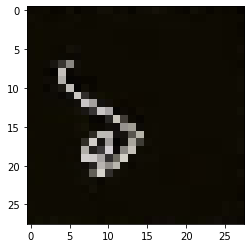

In [44]:
view_image_info(X_train, y_train, np_images, 0)

In [29]:
y_train.iloc[0]

9

In [24]:
from pathlib import Path

In [61]:
def load_image(folder_path, count):
    image_size = (28,28)
    folder_path = Path(folder_path)
    file_list = list(folder_path.iterdir())
    # print(file_list)
    images = []
    for i, filename in enumerate(file_list):
        # print(filename)
        # read image
        image = cv2.imread(str(filename))
        # resize
        image = cv2.resize(image, image_size)
        # convert to rgb
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # black ink on white page. invert
        image = 255 - image
        # normalize
        image = image / 255
        # channel, height, width
        image = image.transpose(2, 0, 1)
        images.append(image)
        if i == count:
            break
    return np.array(images)

In [26]:
list(Path('.').iterdir())

[WindowsPath('basic_components.py'),
 WindowsPath('convolution.py'),
 WindowsPath('flattening.py'),
 WindowsPath('fullyconnected.py'),
 WindowsPath('layer.py'),
 WindowsPath('maxpooling.py'),
 WindowsPath('model.py'),
 WindowsPath('relu.py'),
 WindowsPath('softmax.py'),
 WindowsPath('testing.ipynb'),
 WindowsPath('testing.py'),
 WindowsPath('utils.py'),
 WindowsPath('__pycache__')]

In [62]:
images = load_image('../Assignment4-Materials/NumtaDB_with_aug/training-a/', count=100)

In [63]:
len(images)

101

In [53]:
import matplotlib.pyplot as plt

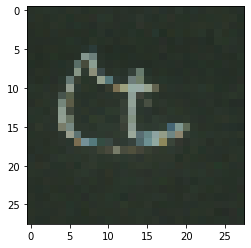

In [66]:
plt.imshow(images[0].transpose(1,2,0))

In [60]:
import pandas as pd

In [74]:
# load label from csv
csv_path = Path('../Assignment4-Materials/NumtaDB_with_aug/training-a.csv')
dataframe = pd.read_csv(csv_path)

In [75]:
# take first 100 digits
datafram_head = dataframe[:100]

In [77]:
y = np.array(datafram_head['digit'])

In [79]:
y.shape

(100,)

In [80]:
np.eye(10)[y].astype(int)

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0,